## DataViz et test stats

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
Incidents = pd.read_csv("Data/Incidents_2009_2024.csv")

C:\Users\loreb\AppData\Local\Temp\ipykernel_14176\2622443636.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Incidents = pd.read_csv("Data/Incidents_2009_2024.csv")


In [5]:
dico = {'CalYear' : 'object',
        'HourOfCall' : 'object',
       'UPRN' : 'object',
       'USRN' : 'object'}

Incidents = Incidents.astype(dico)
# TimeOfCall et DateOfCall (obj) passe en datetime
Incidents['DateOfCall'] = pd.to_datetime(Incidents['DateOfCall'])
Incidents['TimeOfCall'] = pd.to_datetime(Incidents['TimeOfCall'])

In [6]:
Incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647890 entries, 0 to 1647889
Data columns (total 39 columns):
 #   Column                                  Non-Null Count    Dtype         
---  ------                                  --------------    -----         
 0   IncidentNumber                          1647890 non-null  object        
 1   DateOfCall                              1647890 non-null  datetime64[ns]
 2   CalYear                                 1647890 non-null  object        
 3   TimeOfCall                              1647890 non-null  datetime64[ns]
 4   HourOfCall                              1647890 non-null  object        
 5   IncidentGroup                           1647890 non-null  object        
 6   StopCodeDescription                     1647890 non-null  object        
 7   SpecialServiceType                      527063 non-null   object        
 8   PropertyCategory                        1647890 non-null  object        
 9   PropertyType            

In [15]:
pd.set_option('max_colwidth',50)
pd.set_option('display.max_columns',50)
Incidents.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,235138081.0,2009-01-01,2009,1900-01-01 00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0
1,1091.0,2009-01-01,2009,1900-01-01 00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,Open land/water - nearest gazetteer location,SE1 7SG,SE1,NaN,NaN,E09000022,LAMBETH,Lambeth,E05014118,Waterloo & South Bank,Waterloo & South Bank,530485.0,179007.0,530450,179050,51.494957,-0.121712,London,Lambeth,NaN,NaN,NaN,NaN,NaN,NaN,1,60,255,1.0
2,2091.0,2009-01-01,2009,1900-01-01 00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,NaN,NaN,E09000010,ENFIELD,Enfield,E05013682,Haselbury,Haselbury,533773.0,194492.0,533750,194450,51.633342,-0.068488,London,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0
3,3091.0,2009-01-01,2009,1900-01-01 00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,100021491527.0,21401491.0,E09000017,HILLINGDON,Hillingdon,E05013571,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,51.533882,-0.448089,London,Hillingdon,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0
4,5091.0,2009-01-01,2009,1900-01-01 00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,NaN,NaN,E09000019,ISLINGTON,Islington,E05013708,Laycock,Laycock,531058.0,185307.0,531050,185350,51.551441,-0.111120,London,Holloway,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0


## Distribution de variables quantitatives et corrélations

In [7]:
Incidents[["FirstPumpArriving_AttendanceTime","SecondPumpArriving_AttendanceTime","NumStationsWithPumpsAttending",
           "PumpCount","PumpMinutesRounded","Notional Cost (£)","NumCalls"]].describe()

,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
count,1.518240e+06,589433.000000,1.635159e+06,1.647890e+06,1.647890e+06,1.647890e+06,1.646045e+06
mean,3.179647e+02,394.827444,1.366489e+00,1.592009e+00,7.638405e+01,3.952970e+02,1.333163e+00
std,1.389990e+02,153.647296,6.743328e-01,1.594388e+00,5.826991e+02,2.747501e+03,1.501418e+00
min,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,6.000000e+01,2.550000e+02,1.000000e+00
25%,2.300000e+02,294.000000,1.000000e+00,1.000000e+00,6.000000e+01,2.600000e+02,1.000000e+00
50%,2.960000e+02,368.000000,1.000000e+00,1.000000e+00,6.000000e+01,3.280000e+02,1.000000e+00
75%,3.780000e+02,463.000000,2.000000e+00,2.000000e+00,6.000000e+01,3.520000e+02,1.000000e+00
max,1.200000e+03,1200.000000,4.600000e+01,9.510000e+02,5.256290e+05,2.277726e+06,3.690000e+02


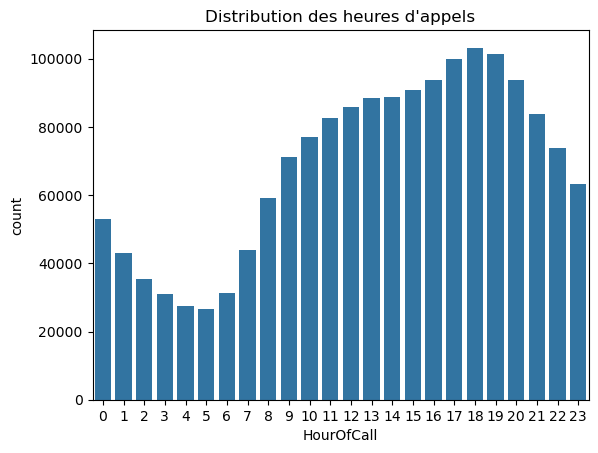

In [22]:
sns.countplot(x = "HourOfCall" , data = Incidents)
plt.title("Distribution des heures d'appels")
plt.show()

In [8]:
#Outlier de 1stPumpArriving : Q3 + 1.5*(IQR) et Q1 - 1.5*(IQR)
IQR = (Incidents["FirstPumpArriving_AttendanceTime"].quantile(0.75)) - (Incidents["FirstPumpArriving_AttendanceTime"].quantile(0.25)) 
Out_low = (Incidents["FirstPumpArriving_AttendanceTime"].quantile(0.25)) -1.5*IQR
Out_high = (Incidents["FirstPumpArriving_AttendanceTime"].quantile(0.75)) +1.5*IQR

print(Out_high,Out_low)


600.0 8.0


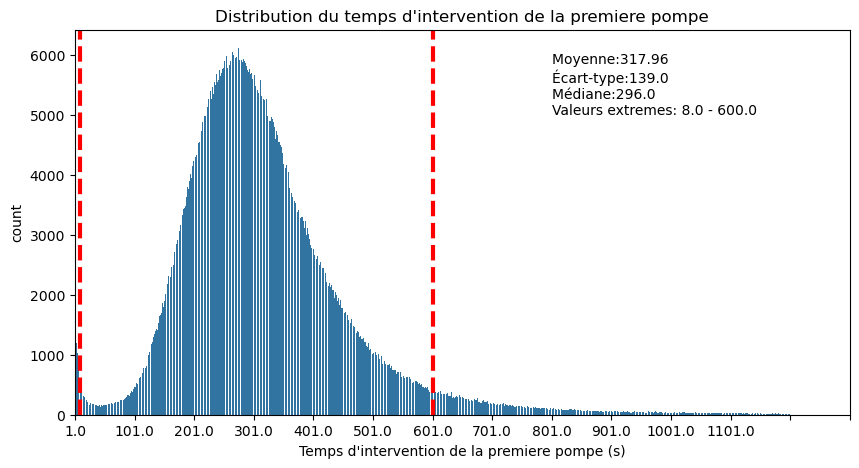

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x = "FirstPumpArriving_AttendanceTime" , data = Incidents)
plt.axvline(x= Out_low, linewidth = 3, c ='red', linestyle = '--')
plt.axvline(x= Out_high, linewidth =3,c='red', linestyle = '--')
plt.text(x=800,y=5000, s = f'Moyenne:{Incidents.FirstPumpArriving_AttendanceTime.mean().round(2)} \nÉcart-type:{Incidents.FirstPumpArriving_AttendanceTime.std().round(2)} \nMédiane:{Incidents.FirstPumpArriving_AttendanceTime.median().round(2)} \nValeurs extremes: {Out_low} - {Out_high}')
plt.xticks(list(range(0,1400,100)))
plt.title("Distribution du temps d'intervention de la premiere pompe")
plt.xlabel("Temps d'intervention de la premiere pompe (s)")

plt.show()

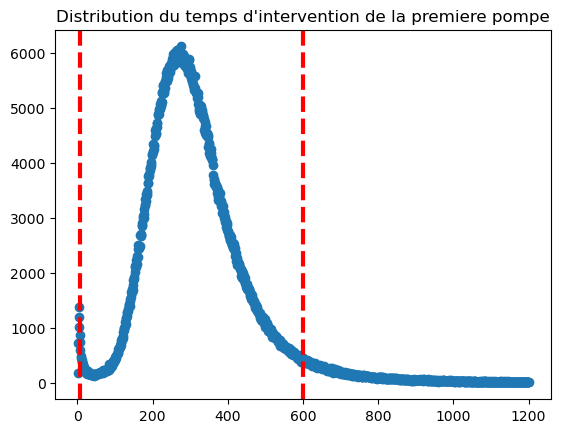

In [52]:
plt.scatter(Incidents["FirstPumpArriving_AttendanceTime"].value_counts().index,Incidents["FirstPumpArriving_AttendanceTime"].value_counts().values)
plt.title("Distribution du temps d'intervention de la premiere pompe");
plt.axvline(x= Out_low, linewidth = 3, c ='red', linestyle = '--')
plt.axvline(x= Out_high, linewidth =3,c='red', linestyle = '--')

In [27]:
# stats et outlier nb de pompes intervenant
pump_25,pump75 = Incidents.PumpCount.quantile([0.25,0.75])
IQR_pump = pump75 -pump_25
IQR_low = pump_25 - IQR*1.5
IQR_high = pump_25 + IQR*1.5
print(IQR_low,IQR_high)
print("moy:", Incidents.PumpCount.mean(),"\necart-type:",Incidents.PumpCount.mean())

-221.0 223.0
moy: 1.5920085685330938 
ecart-type: 1.5920085685330938


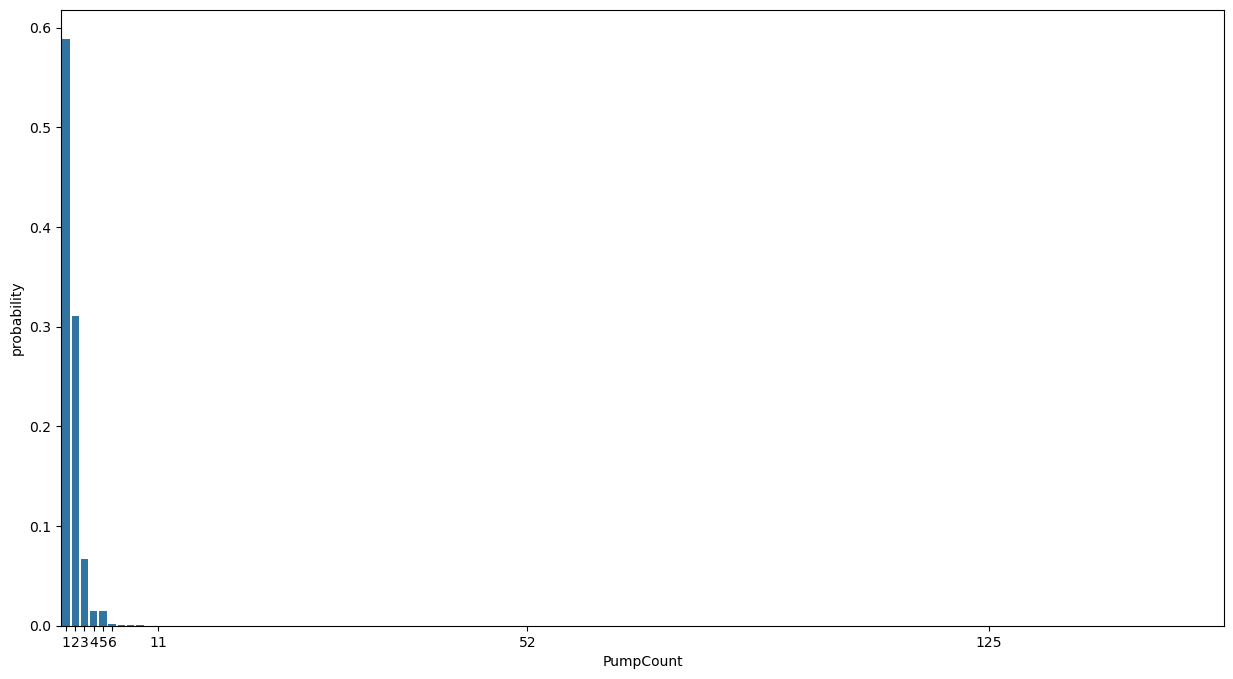

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(x = "PumpCount" , data = Incidents, stat ='probability',)
plt.xticks([0,1,2,3,4,5,10,50,100])
plt.show()

# La maorité des incidents implique 1-2 pompes

In [23]:
# Incidents où il y a plus de sept pompes
Incidents.query("PumpCount > 7")

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
44,70091.0,2009-01-01,2009,1900-01-01 01:14:27,1,Fire,Primary Fire,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,W10,0.0,20201243.0,E09000005,BRENT,Brent,E05013507,Queens Park,Queens Park,NaN,NaN,523850,182750,NaN,NaN,London,North Kensington,472.0,Paddington,689.0,North Kensington,2.0,2.0,11,1462,6214,16.0
705,1235091.0,2009-01-02,2009,1900-01-01 23:39:58,23,Fire,Primary Fire,NaN,Non Residential,Other bulk storage,In street close to gazetteer location,SW11 5AY,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014019,Shaftesbury & Queenstown,Shaftesbury & Queenstown,528115.0,176159.0,528150,176150,51.469903,-0.156865,London,Battersea,373.0,Clapham,388.0,Clapham,2.0,4.0,15,2616,11118,6.0
824,1426091.0,2009-01-03,2009,1900-01-01 10:23:22,10,Fire,Primary Fire,NaN,Non Residential,Restaurant/cafe,Correct incident location,W1D 5LF,W1D,100023472003.0,8401333.0,E09000033,WESTMINSTER,Westminster,E05013808,West End,West End,529801.0,180978.0,529850,180950,51.512827,-0.130835,London,Soho,130.0,Soho,130.0,Soho,4.0,6.0,8,1273,5410,6.0
1278,2171091.0,2009-01-04,2009,1900-01-01 12:57:10,12,Fire,Primary Fire,NaN,Dwelling,Purpose Built Flats/Maisonettes - 10 or more s...,Correct incident location,NaN,N16,0.0,21606643.0,E09000019,ISLINGTON,Islington,E05013709,Mildmay,Mildmay,NaN,NaN,533250,185150,NaN,NaN,London,Stoke Newington,506.0,Kingsland,NaN,NaN,4.0,6.0,8,873,3710,29.0
3373,5503091.0,2009-01-09,2009,1900-01-01 00:33:36,0,Fire,Primary Fire,NaN,Other Residential,Hotel/motel,Correct incident location,SW5 9NH,SW5,217087503.0,21700556.0,E09000020,KENSINGTON AND CHELSEA,Kensington And chelsea,E05009395,Earl's Court,Earl'S Court,525250.0,178750.0,525250,178750,51.493830,-0.197174,London,Kensington,244.0,Kensington,342.0,Hammersmith,4.0,7.0,8,638,2712,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644846,183424-22112023,2023-11-22,2023,1900-01-01 20:37:23,20,Fire,Primary Fire,NaN,Outdoor Structure,Common external bin storage area,On land associated with building,N15 4FZ,N15,10093593709.0,21103524.0,E09000014,HARINGEY,Haringey,E05013601,TOTTENHAM CENTRAL,Tottenham Central,533083.0,189288.0,533050,189250,51.586748,-0.080415,London,Tottenham,554.0,Tottenham,339.0,Hornsey,2.0,2.0,8,1068,6906,31.0
1646094,185475-26112023,2023-11-26,2023,1900-01-01 04:29:27,4,Fire,Primary Fire,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,NaN,E8,0.0,20900120.0,E09000012,HACKNEY,Hackney,E05009370,DALSTON,Dalston,NaN,NaN,533650,184750,NaN,NaN,London,Shoreditch,358.0,Stoke Newington,360.0,Homerton,4.0,5.0,9,1362,8808,3.0
1647012,186917-28112023,2023-11-28,2023,1900-01-01 18:11:15,18,Fire,Primary Fire,NaN,Road Vehicle,Car,On land associated with building,EN3 6XA,EN3,207189967.0,20702286.0,E09000010,ENFIELD,Enfield,E05013680,ENFIELD LOCK,Enfield Lock,535739.0,198651.0,535750,198650,51.670246,-0.038471,London,Enfield,306.0,Enfield,307.0,Enfield,4.0,5.0,11,463,2994,8.0
1647063,187009-28112023,2023-11-28,2023,1900-01-01 20:56:25,20,Fire,Primary Fire,NaN,Non Residential,Gym,Within same building,W1F 7SJ,W1F,10033613395.0,8400395.0,E09000033,WESTMINSTER,Westminster,E05013808,WEST END,West End,529330.0,181049.0,529350,181050,51.513573,-0.137584,Lo

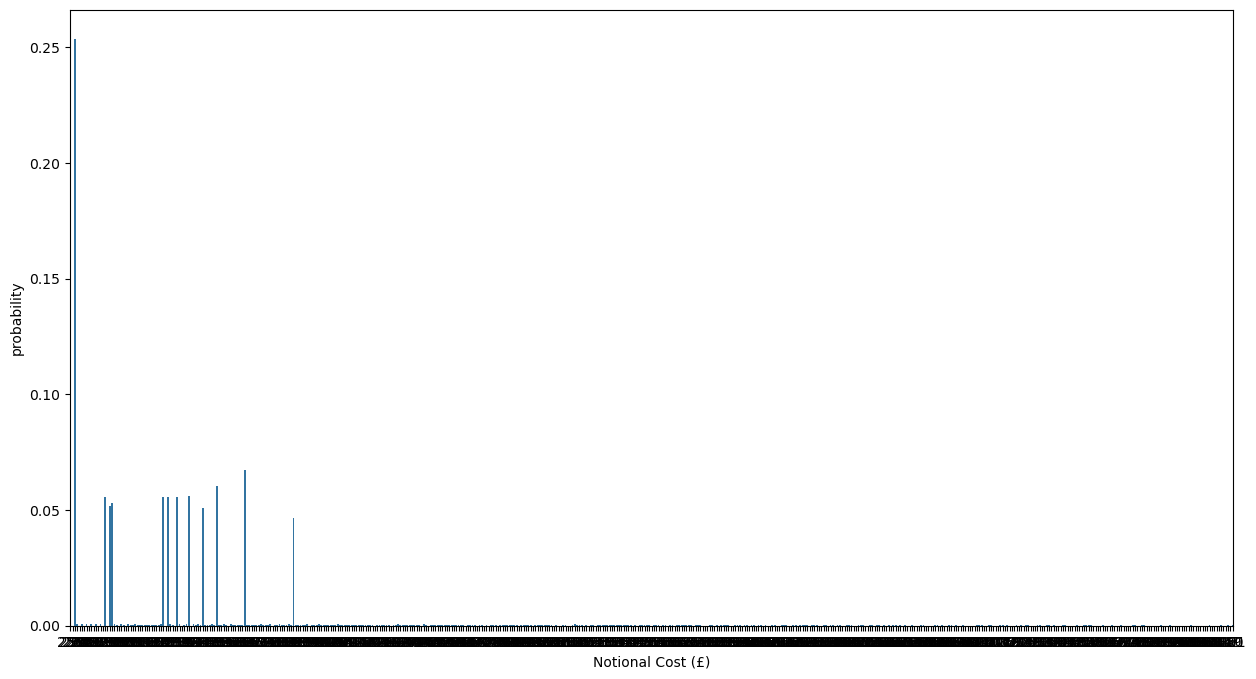

395.29700708178336


In [9]:
plt.figure(figsize=(15,8))
sns.countplot(x = "Notional Cost (£)" , data = Incidents, stat ='probability')
plt.xlim(0,500)
plt.show()
print(Incidents["Notional Cost (£)"].mean())

In [29]:
# Stats de pompes et utilisation en fonction du type d'urgence
Incidents.groupby('IncidentGroup')[["NumStationsWithPumpsAttending","NumPumpsAttending","PumpMinutesRounded","PumpCount"]].agg(["mean","min","max","var"])


NumStationsWithPumpsAttending                       \
                                         mean  min   max       var   
IncidentGroup                                                        
False Alarm                          1.513587  1.0   8.0  0.550460   
Fire                                 1.421788  1.0  46.0  0.565912   
Special Service                      1.103458  1.0  34.0  0.133456   

                NumPumpsAttending                       PumpMinutesRounded  \
                             mean  min    max       var               mean   
IncidentGroup                                                                
False Alarm              1.765901  1.0   10.0  0.756313          62.146375   
Fire                     1.646518  1.0  106.0  0.931970         122.694658   
Special Service          1.169878  1.0   61.0  0.237975          70.872393   

                                           PumpCount                     
                min     max            var      mean min  max       var  
IncidentGroup                                                            
False Alarm      60    2852     229.902482  1.765550   1   13  0.768347  
Fire             60  129751  519408.170204  1.829748   1  402  7.523186  
Special Service  60  525629  752470.901741  1.185140   1  951  2.076072

## Corrélations entre variables qualitatives

In [37]:
Variable_qt =["HourOfCall","FirstPumpArriving_AttendanceTime","SecondPumpArriving_AttendanceTime",
              "NumStationsWithPumpsAttending","NumPumpsAttending","PumpCount","PumpMinutesRounded",
              "Notional Cost (£)"]

cor = Incidents[Variable_qt].corr()
cor

,HourOfCall,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£)
HourOfCall,1.000000,-0.034581,-0.027485,0.013721,0.009466,0.002030,-0.002564,-0.002986
FirstPumpArriving_AttendanceTime,-0.034581,1.000000,0.657873,-0.040434,-0.076289,-0.042256,0.006642,0.005885
SecondPumpArriving_AttendanceTime,-0.027485,0.657873,1.000000,0.135036,-0.054813,-0.014108,0.015860,0.016121
NumStationsWithPumpsAttending,0.013721,-0.040434,0.135036,1.000000,0.866341,0.541616,0.097966,0.101243
NumPumpsAttending,0.009466,-0.076289,-0.054813,0.866341,1.000000,0.630812,0.119126,0.121423
PumpCount,0.002030,-0.042256,-0.014108,0.541616,0.630812,1.000000,0.604200,0.647443
PumpMinutesRounded,-0.002564,0.006642,0.015860,0.097966,0.119126,0.604200,1.000000,0.994006
Notional Cost (£),-0.002986,0.005885,0.016121,0.101243,0.121423,0.647443,0.994006,1.000000


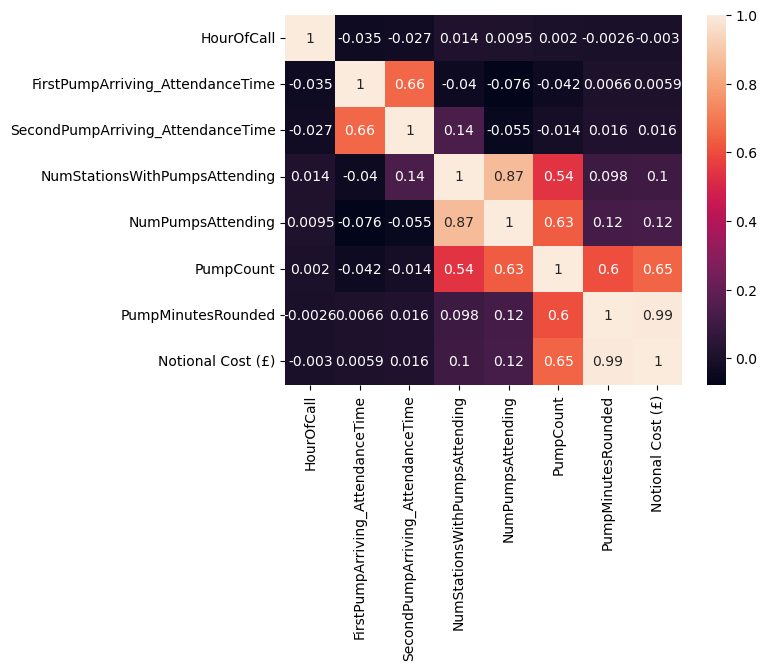

In [38]:
sns.heatmap(cor, annot=True);
# Corrélation entre l'arrivée de la 1er et seconde pompe
# Corrélation entre le nombre de pompe, le temps d'action des pompes et le cout supposé

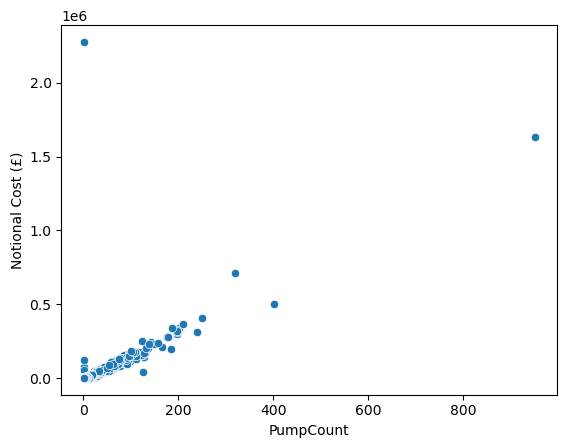

In [5]:
# cout ~ Nb pompe
sns.scatterplot(x ="PumpCount", y = "Notional Cost (£)", data = Incidents)
plt.show()

In [5]:
# Cout moyen et total en fonction du type d'urgence

Incidents.groupby('IncidentGroup')[["Notional Cost (£)"]].agg(["mean","sum","var"])


Notional Cost (£)                         
                             mean        sum           var
IncidentGroup                                             
False Alarm            322.120406  260658866  8.152341e+03
Fire                   629.881725  196220755  1.413032e+07
Special Service        368.999103  194526364  1.519280e+07

<AxesSubplot:xlabel='IncidentGroup', ylabel='Notional Cost (£)'>

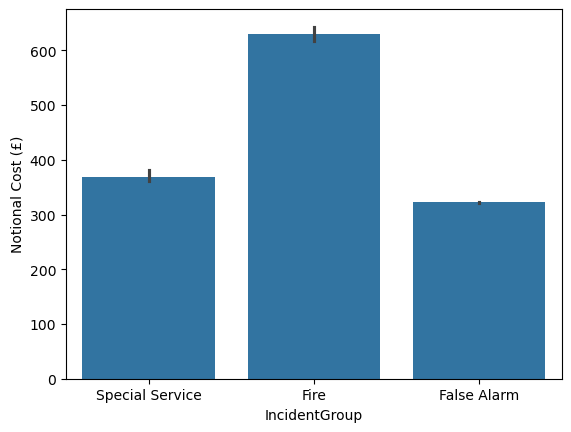

In [10]:
# Cout moyen en fonction du type d'urgence
sns.barplot(y= "Notional Cost (£)", x="IncidentGroup" , data = Incidents)

In [71]:
Incidents["PumpMinutesRounded"].value_counts()

PumpMinutesRounded
60      1442796
61         5057
62         4905
63         4890
64         4396
         ...   
5500          1
2671          1
5728          1
4912          1
1354          1
Name: count, Length: 2941, dtype: int64

In [72]:
Incidents["PumpMinutesRounded"].value_counts()
Incidents[Incidents["PumpMinutesRounded"]>2000]

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
705,1235091.0,2009-01-02,2009,1900-01-01 23:39:58,23,Fire,Primary Fire,NaN,Non Residential,Other bulk storage,In street close to gazetteer location,SW11 5AY,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014019,Shaftesbury & Queenstown,Shaftesbury & Queenstown,528115.0,176159.0,528150,176150,51.469903,-0.156865,London,Battersea,373.0,Clapham,388.0,Clapham,2.0,4.0,15,2616,11118,6.0
9494,15580091.0,2009-01-27,2009,1900-01-01 05:38:09,5,Fire,Primary Fire,NaN,Non Residential,Other private non-residential building,Correct incident location,NaN,CR0,0.0,20502747.0,E09000008,CROYDON,Croydon,E05011484,South Croydon,South Croydon,NaN,NaN,532450,164550,NaN,NaN,London,Croydon,311.0,Croydon,319.0,Croydon,5.0,7.0,17,3722,15819,1.0
10246,16741091.0,2009-01-29,2009,1900-01-01 12:10:52,12,Fire,Primary Fire,NaN,Dwelling,House - single occupancy,Correct incident location,NaN,SE24,0.0,21900934.0,E09000022,LAMBETH,Lambeth,E05014098,Brixton Windrush,Brixton Windrush,NaN,NaN,531450,175050,NaN,NaN,London,Brixton,194.0,Brixton,NaN,NaN,3.0,5.0,15,3383,14378,5.0
10340,16884091.0,2009-01-29,2009,1900-01-01 17:06:20,17,Fire,Primary Fire,NaN,Outdoor,Other outdoor location,On land associated with building,HA9 0DE,HA9,202095995.0,20201178.0,E09000005,BRENT,Brent,E05013516,Wembley Park,Wembley Park,519750.0,185750.0,519750,185750,51.557933,-0.273984,London,Wembley,322.0,Wembley,420.0,Wembley,4.0,5.0,17,3125,13281,6.0
11616,18965091.0,2009-02-02,2009,1900-01-01 07:19:16,7,Fire,Primary Fire,NaN,Non Residential,Oil refinery,Correct incident location,DA8 1DL,DA8,10011845199.0,20100314.0,E09000004,BEXLEY,Bexley,E05011225,Erith,Erith,550656.0,179275.0,550650,179250,51.492353,0.168762,London,Erith,529.0,Erith,539.0,Erith,6.0,7.0,15,3518,14952,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638732,173832-06112023,2023-11-06,2023,1900-01-01 12:53:53,12,Fire,Primary Fire,NaN,Dwelling,Converted Flat/Maisonettes - 3 or more storeys,Correct incident location,NaN,SW1P,0.0,8401330.0,E09000033,WESTMINSTER,Westminster,E05013807,VINCENT SQUARE,Vincent Square,NaN,NaN,529350,179150,NaN,NaN,London,Lambeth,223.0,Chelsea,439.0,Soho,4.0,4.0,32,7787,50356,13.0
1640243,176238-10112023,2023-11-10,2023,1900-01-01 16:15:05,16,Fire,Primary Fire,NaN,Non Residential,Pre School/nursery,Within same building,N17 9UE,N17,10003981509.0,21104307.0,E09000014,HARINGEY,Haringey,E05013596,NORTHUMBERLAND PARK,Northumberland Park,534097.0,190527.0,534050,190550,51.597641,-0.065316,London,Tottenham,274.0,Tottenham,276.0,Tottenham,3.0,4.0,14,2692,17408,8.0
1640616,176849-11112023,2023-11-11,2023,1900-01-01 16:16:26,16,Fire,Primary Fire,NaN,Non Residential,Pub/wine bar/bar,Correct incident location,NW1 4SH,NW1,10033540477.0,8400588.0,E09000033,WESTMINSTER,Westminster,E05013805,REGENT'S PARK,Regent'S Park,527590.0,182442.0,527550,182450,51.526487,-0.162150,London,Paddington,334.0,Paddington,490.0,Kensington,3.0,3.0,13,2376,15365,3.0
1642417,179671-16112023,2023-11-16,2023,1900-01-01 04:33:33,4,Special Service,Special Service,Evacuation (no fire),Outdoor,Road surface/pavement,In street outside gazetteer location,SE11 5NH,SE11,200000467525.0,21900765.0,E09000022,LAMBETH,Lambeth,E05014117,VAUXHALL,Vauxhall,530748.0,178434.0,530750,178450,51.489754,-0.118129,Lo

## Temps de présence en fonction de l'heure

In [5]:
import statsmodels.api


In [5]:
# Séparation des heure de la journées en période.
# 6h-12h: matin ; 12h-18h : Midi/après-midi ; 18h-0h : soir ; 0-6h : nuit

Periode = pd.cut(Incidents.HourOfCall,bins= [0,6,12,18,24],include_lowest=True,right =False,
                 labels=["Nuit","Matin","Midi","Soir"])

Incidents.insert(5,"Periode",Periode)
Incidents.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,Periode,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,235138081.0,2009-01-01,2009,1900-01-01 00:00:37,0,Nuit,Special Service,Special Service,RTC,Road Vehicle,...,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0
1,1091.0,2009-01-01,2009,1900-01-01 00:00:46,0,Nuit,Special Service,Special Service,Assist other agencies,Outdoor,...,NaN,NaN,NaN,NaN,NaN,NaN,1,60,255,1.0
2,2091.0,2009-01-01,2009,1900-01-01 00:03:00,0,Nuit,Fire,Secondary Fire,NaN,Outdoor,...,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0
3,3091.0,2009-01-01,2009,1900-01-01 00:04:27,0,Nuit,Fire,Secondary Fire,NaN,Outdoor,...,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0
4,5091.0,2009-01-01,2009,1900-01-01 00:05:39,0,Nuit,Fire,Secondary Fire,NaN,Outdoor,...,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0


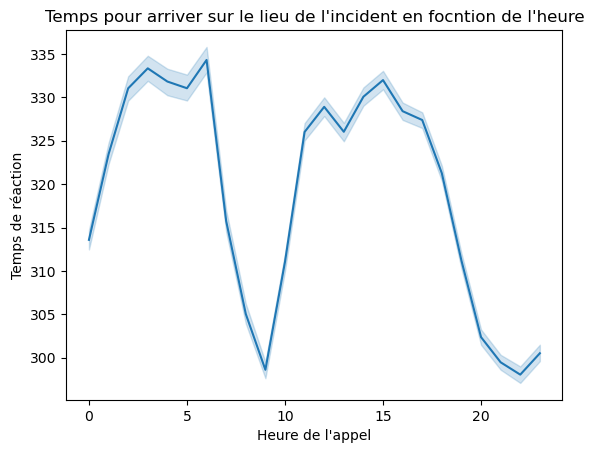

In [74]:
sns.lineplot(x ="HourOfCall",y = 'FirstPumpArriving_AttendanceTime' , data = Incidents)
plt.xlabel("Heure de l'appel")
plt.ylabel("Temps de présence")
plt.title("Temps passer sur les lieux en fonction de l'heure")
plt.show()

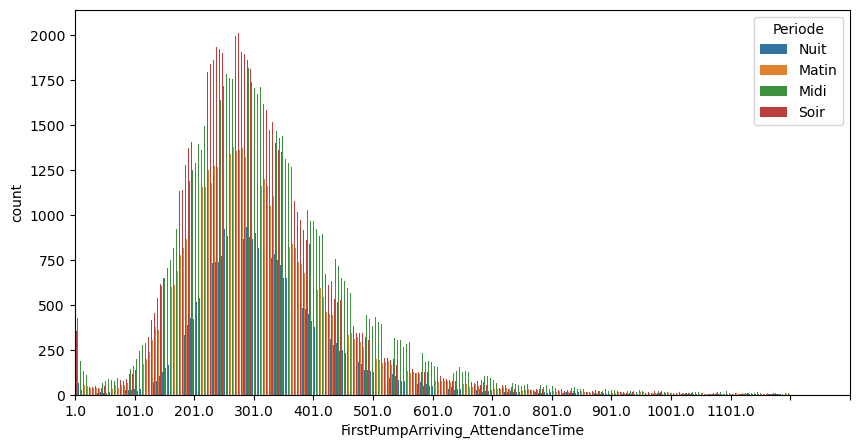

In [78]:
# Distribution du temps d'arrivée du premier camion en fonction de la période
plt.figure(figsize=(10,5))
sns.countplot(x = "FirstPumpArriving_AttendanceTime" , hue = "Periode" ,data = Incidents)
plt.xticks(list(range(0,1400,100)))
plt.show()
# distributions similaire niveau dispersion, moyennes léger diffs

<AxesSubplot:title={'center':'FirstPumpArriving_AttendanceTime'}, xlabel='Periode'>

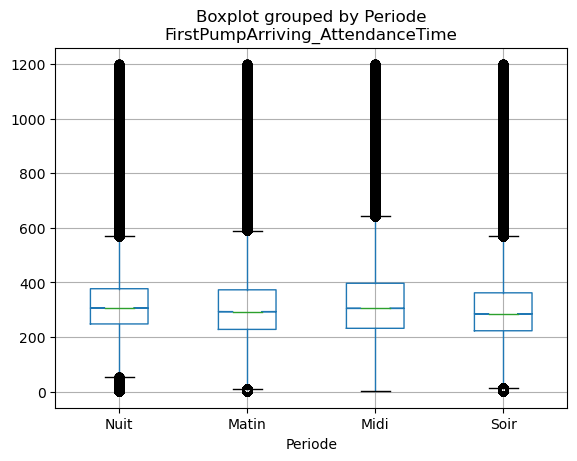

In [79]:
# boxplot du temps de réponse en focntion de la période de la journée
Incidents.boxplot(column='FirstPumpArriving_AttendanceTime', by = 'Periode' ,notch=True)
plt.show()

<AxesSubplot:xlabel='Periode', ylabel='FirstPumpArriving_AttendanceTime'>

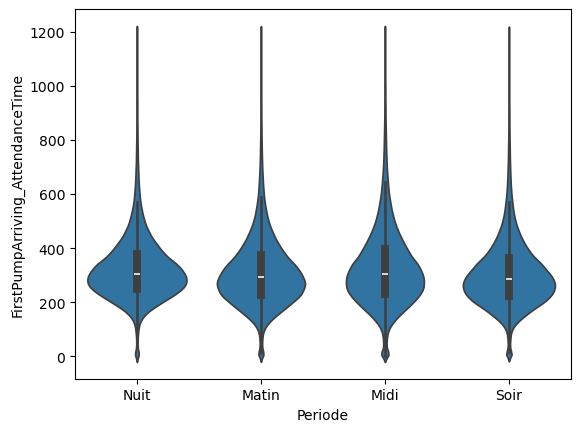

In [81]:
sns.violinplot(y ='FirstPumpArriving_AttendanceTime', x = 'Periode' ,data = Incidents)


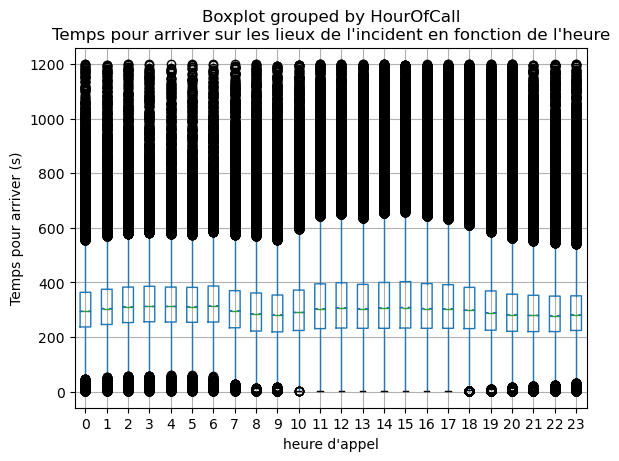

In [21]:
# temps d'arrivé en fonction de l'heure
Incidents.boxplot(column='FirstPumpArriving_AttendanceTime', by = 'HourOfCall' ,notch=True)
plt.xlabel("heure d'appel")
plt.ylabel("Temps pour arriver (s)")
plt.title("Temps passer sur les lieux de l'incident en fonction de l'heure")
plt.show()


In [29]:
Incidents.groupby('Periode')["FirstPumpArriving_AttendanceTime"].agg(["mean","median",'var','min','max'])

/var/folders/h7/s4gght1j63df7l8xt_syhm5c0000gn/T/ipykernel_53454/3242220266.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Incidents.groupby('Periode')["FirstPumpArriving_AttendanceTime"].agg(["mean","median",'var','min','max'])


,mean,median,var,min,max
Periode,,,,,
Nuit,325.708611,306.0,15856.863744,1.0,1200.0
Matin,313.569393,293.0,18232.154359,1.0,1200.0
Midi,328.772383,305.0,22726.010781,1.0,1200.0
Soir,306.479834,285.0,17702.234195,1.0,1200.0


In [42]:
Incidents[Incidents["FirstPumpArriving_AttendanceTime"] > 1000]

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,Periode,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
85,163091.0,2009-01-01,2009,1900-01-01 03:56:47,3,Nuit,False Alarm,False alarm - Good intent,NaN,Dwelling,...,1130.0,Beckenham,NaN,NaN,2.0,2.0,2,60,255,1.0
182,329091.0,2009-01-01,2009,1900-01-01 11:21:50,11,Matin,Special Service,Special Service,Lift Release,Non Residential,...,1032.0,Euston,NaN,NaN,1.0,1.0,1,60,255,1.0
2064,3467091.0,2009-01-06,2009,1900-01-01 12:32:15,12,Midi,Special Service,Special Service,Flooding,Dwelling,...,1085.0,Feltham,NaN,NaN,1.0,1.0,1,60,255,1.0
2111,3547091.0,2009-01-06,2009,1900-01-01 15:09:26,15,Midi,Special Service,Special Service,Flooding,Dwelling,...,1081.0,Addington,NaN,NaN,1.0,1.0,1,60,255,1.0
2642,4359091.0,2009-01-07,2009,1900-01-01 14:36:43,14,Midi,Special Service,Special Service,Flooding,Dwelling,...,1168.0,Mitcham,NaN,NaN,1.0,1.0,1,60,255,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645899,185187-25112023,2023-11-25,2023,1900-01-01 17:51:47,17,Midi,Special Service,Special Service,Evacuation (no fire),Non Residential,...,1103.0,East Ham,NaN,NaN,1.0,1.0,2,151,976,1.0
1646639,186337-27112023,2023-11-27,2023,1900-01-01 16:52:51,16,Midi,Special Service,Special Service,Making Safe (not RTC),Outdoor Structure,...,1051.0,Croydon,NaN,NaN,1.0,1.0,1,60,388,2.0
1646903,186732-28112023,2023-11-28,2023,1900-01-01 11:41:49,11,Matin,Special Service,Special Service,Flooding,Dwelling,...,1105.0,Hammersmith,NaN,NaN,1.0,1.0,1,60,388,1.0
1647271,187341-29112023,2023-11-29,2023,1900-01-01 12:05:01,12,Midi,Special Service,Special Service,Effecting entry/exit,Dwelling,...,1004.0,Heston,NaN,NaN,1.0,1.0,1,60,388,2.0


<Figure size 700x1200 with 0 Axes>

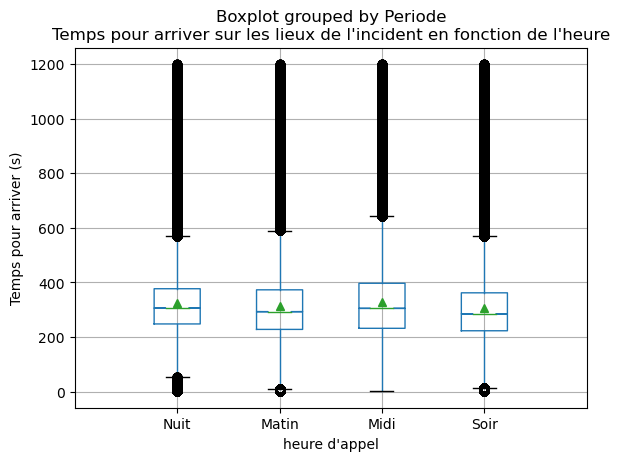

In [16]:
plt.figure(figsize=(7,12))
Incidents.boxplot(column='FirstPumpArriving_AttendanceTime', by = 'Periode' ,notch=True, showmeans = True)
plt.xlabel("heure d'appel")
plt.ylabel("Temps pour arriver (s)")
plt.title("Temps pour arriver sur les lieux de l'incident en fonction de l'heure")
plt.xlim(0,6)
plt.show()


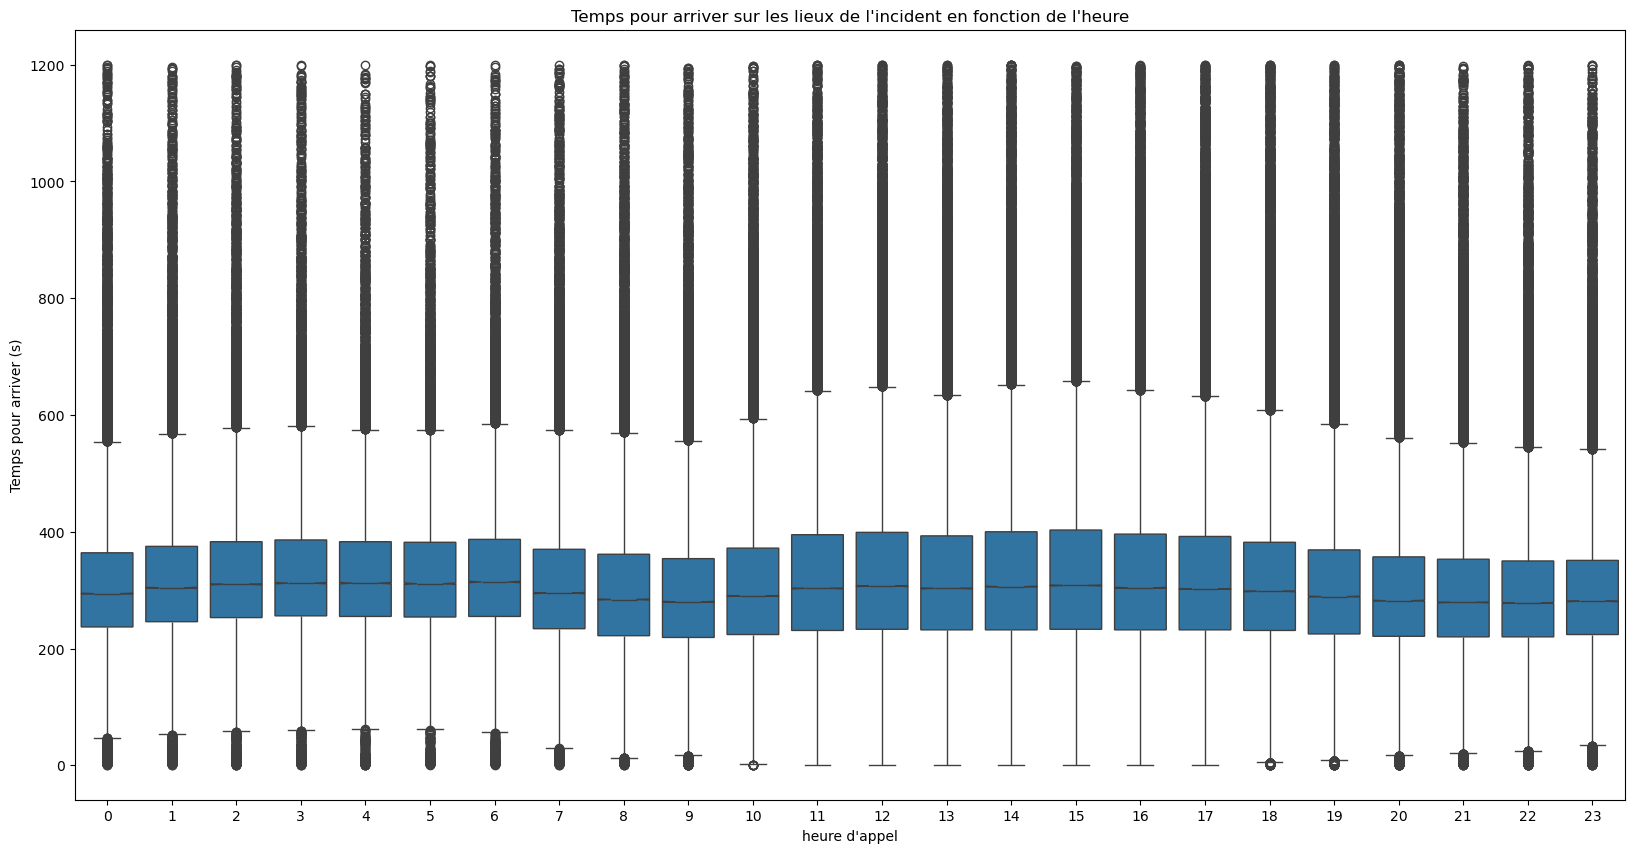

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(y='FirstPumpArriving_AttendanceTime', x = 'HourOfCall',data =Incidents ,notch=True)
plt.xlabel("heure d'appel")
plt.ylabel("Temps pour arriver (s)")
plt.title("Temps de présence sur les lieux de l'incident en fonction de l'heure")
plt.show()


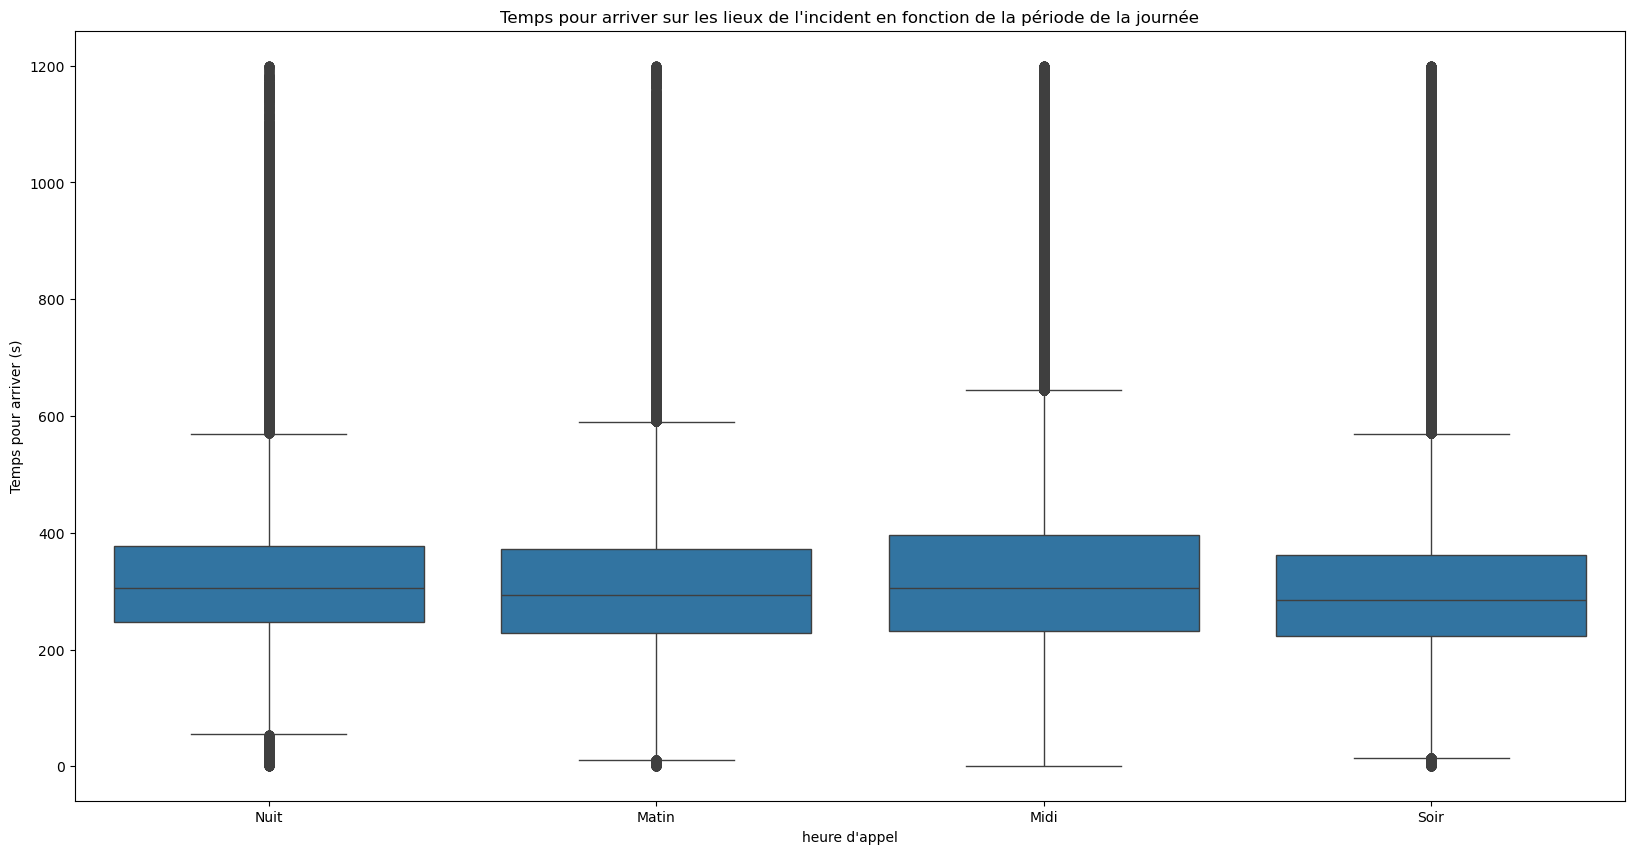

In [60]:
plt.figure(figsize=(20,10))
sns.boxplot(y='FirstPumpArriving_AttendanceTime', x = 'Periode',data =Incidents )
plt.xlabel("heure d'appel")
plt.ylabel("Temps pour arriver (s)")
plt.title("Temps de présence sur les lieux de l'incident en fonction de la période de la journée")
plt.show()

In [152]:
# ANOVA Temps d'arriveé de la première pompe en fonction de l'heure de l'appel. (Naif)
md = statsmodels.formula.api.ols("FirstPumpArriving_AttendanceTime ~ HourOfCall", data=Incidents).fit()
statsmodels.api.stats.anova_lm(md,typ=2)


,sum_sq,df,F,PR(>F)
HourOfCall,2.320461e+08,23.0,526.339528,0.0
Residual,2.910141e+10,1518216.0,NaN,NaN


In [147]:
# Pour chaque heure , regroupe les valeurs de FirstPumpArriving_AttendanceTime
result = []
for heure in range(0,24): 
    heure = Incidents["FirstPumpArriving_AttendanceTime"][Incidents.HourOfCall == heure ]
    result.append(heure)

In [145]:

# conditions : Indépendances des variables, normalité des résidus, homoscédasticité
# Homoscédasticité
from scipy.stats import bartlett
Incidents.groupby('HourOfCall')['FirstPumpArriving_AttendanceTime'].agg('var')


HourOfCall
0     15558.983262
1     15602.212356
2     16207.931823
3     16206.324650
4     15784.315954
5     15589.030922
6     16085.006973
7     17039.306916
8     17025.738948
9     16109.828336
10    18323.274984
11    21725.058651
12    22425.577278
13    21928.038228
14    23646.778770
15    23569.589254
16    22843.712857
17    21984.436649
18    20283.933230
19    18950.224621
20    17413.387024
21    16292.823233
22    15902.533800
23    15387.592233
Name: FirstPumpArriving_AttendanceTime, dtype: float64

In [148]:
bartlett(*result)
# Pas d'homoscédasticité 
            

BartlettResult(statistic=19654.05702323602, pvalue=0.0)

In [85]:
Incidents.groupby('Periode')['FirstPumpArriving_AttendanceTime'].agg(['mean','var'])

/var/folders/h7/s4gght1j63df7l8xt_syhm5c0000gn/T/ipykernel_73185/2451758333.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Incidents.groupby('Periode')['FirstPumpArriving_AttendanceTime'].agg(['mean','var'])


,mean,var
Periode,,
Nuit,325.708611,15856.863744
Matin,313.569393,18232.154359
Midi,328.772383,22726.010781
Soir,306.479834,17702.234195


In [149]:
# Pour chaque Periodes , regroupe les valeurs de FirstPumpArriving_AttendanceTime
resultat = []
for period in Incidents["Periode"].unique() : 
    period = Incidents["FirstPumpArriving_AttendanceTime"][Incidents.Periode == period]
    resultat.append(period)

In [150]:
bartlett(*resultat)

BartlettResult(statistic=14092.022638109458, pvalue=0.0)

In [159]:
# Normalité des résidus

from scipy.stats import shapiro
shapiro(md.resid)
#Pas de normailté
# Centré réduire

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9090998768806458, pvalue=0.0)

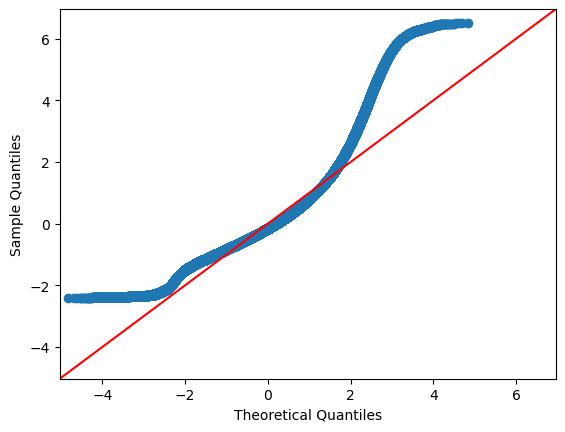

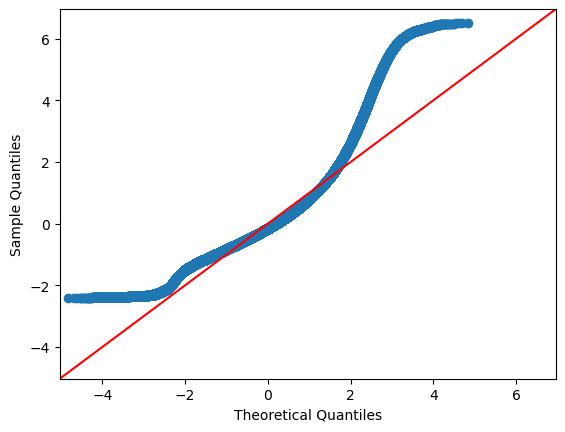

In [165]:
statsmodels.api.qqplot(md.resid,fit = True, line = '45')

In [156]:
md2 = statsmodels.formula.api.ols("FirstPumpArriving_AttendanceTime ~ Periode", data=Incidents).fit()
statsmodels.api.stats.anova_lm(md2,typ=2)


,sum_sq,df,F,PR(>F)
Periode,1.399328e+08,3.0,2425.777628,0.0
Residual,2.919353e+10,1518236.0,NaN,NaN


In [158]:
# Comparaison pariwise
b = md2.t_test_pairwise("Periode")
b.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Matin-Nuit,-12.139218,0.389490,-31.166975,3.490017e-213,-12.902605,-11.375831,1.047005e-212,True
Midi-Nuit,3.063772,0.365460,8.383333,5.149252e-17,2.347483,3.780061,5.149252e-17,True
Soir-Nuit,-19.228778,0.368000,-52.252078,0.000000e+00,-19.950045,-18.507510,0.000000e+00,True
Midi-Matin,15.202990,0.308376,49.300149,0.000000e+00,14.598583,15.807397,0.000000e+00,True
Soir-Matin,-7.089560,0.311383,-22.768004,9.950472e-115,-7.699859,-6.479260,1.990094e-114,True
Soir-Midi,-22.292550,0.280745,-79.404976,0.000000e+00,-22.842800,-21.742299,0.000000e+00,True


In [9]:
from scipy.stats import kruskal 
Incidents_75 = Incidents[Incidents["FirstPumpArriving_AttendanceTime"] <=Incidents.FirstPumpArriving_AttendanceTime.quantile(0.75)]
Incidents_75
#rst = kruskal(Incidents_75["FirstPumpArriving_AttendanceTime"],Incidents_75["Periode"],nan_policy = 'omit')


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,Periode,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,235138081.0,2009-01-01,2009,1900-01-01 00:00:37,0,Nuit,Special Service,Special Service,RTC,Road Vehicle,...,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0
2,2091.0,2009-01-01,2009,1900-01-01 00:03:00,0,Nuit,Fire,Secondary Fire,NaN,Outdoor,...,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0
3,3091.0,2009-01-01,2009,1900-01-01 00:04:27,0,Nuit,Fire,Secondary Fire,NaN,Outdoor,...,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0
4,5091.0,2009-01-01,2009,1900-01-01 00:05:39,0,Nuit,Fire,Secondary Fire,NaN,Outdoor,...,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0
5,6091.0,2009-01-01,2009,1900-01-01 00:06:03,0,Nuit,False Alarm,AFA,NaN,Dwelling,...,172.0,Kentish Town,222.0,Kentish Town,1.0,2.0,2,60,255,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647884,188309-30112023,2023-11-30,2023,1900-01-01 23:47:17,23,Soir,False Alarm,False alarm - Good intent,NaN,Road Vehicle,...,270.0,Chelsea,NaN,NaN,1.0,1.0,1,60,388,1.0
1647885,188310-30112023,2023-11-30,2023,1900-01-01 23:47:53,23,Soir,Special Service,Special Service,Assist other agencies,Dwelling,...,335.0,New Cross,NaN,NaN,1.0,1.0,1,60,388,1.0
1647886,188311-30112023,2023-11-30,2023,1900-01-01 23:50:18,23,Soir,False Alarm,AFA,NaN,Non Residential,...,238.0,Harold Hill,NaN,NaN,1.0,1.0,1,60,388,1.0
1647887,188312-30112023,2023-11-30,2023,1900-01-01 23:50:35,23,Soir,Special Service,Special Service,Effecting entry/exit,Dwelling,...,267.0,West Hampstead,NaN,NaN,1.0,1.0,1,60,388,1.0


In [155]:
a = md.t_test_pairwise("HourOfCall")
a.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
1-0,9.868880,0.930442,10.606663,2.780714e-26,8.045247,11.692514,3.086592e-24,True
2-0,17.457245,0.984622,17.729900,2.505415e-70,15.527420,19.387070,3.833285e-68,True
3-0,19.762156,1.024200,19.295210,6.029240e-83,17.754759,21.769553,9.767369e-81,True
4-0,18.242309,1.063667,17.150398,6.332521e-66,16.157558,20.327059,9.372131e-64,True
5-0,17.469373,1.077906,16.206766,4.569211e-59,15.356714,19.582032,6.488280e-57,True
...,...,...,...,...,...,...,...,...
22-20,-4.318490,0.709421,-6.087347,1.148247e-09,-5.708931,-2.928050,9.071147e-08,True
23-20,-1.855154,0.741593,-2.501580,1.236416e-02,-3.308650,-0.401657,3.449227e-01,False
22-21,-1.420922,0.727006,-1.954485,5.064405e-02,-2.845829,0.003984,6.812577e-01,False
23-21,1.042414,0.758432,1.374433,1.693076e-01,-0.444087,2.528916,9.485905e-01,False


## Nombre d'intervention en fonction de l'heure

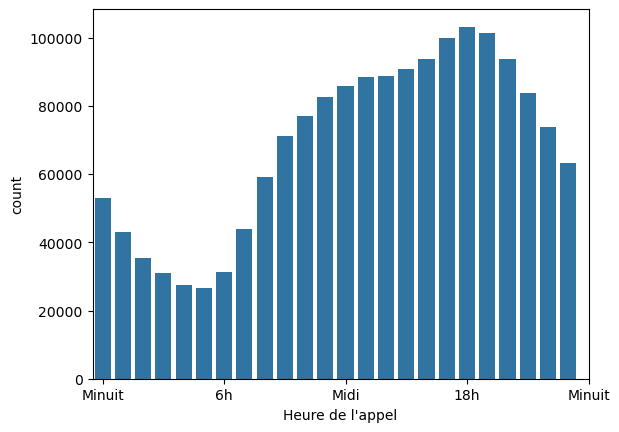

In [12]:
sns.countplot(x ="HourOfCall", data = Incidents)
plt.xticks([0, 6, 12, 18, 24], ['Minuit', '6h', 'Midi', '18h', 'Minuit'])
plt.xlabel("Heure de l'appel")


In [ ]:
Incidents['HourOfCall'].astype('O').value_counts()

In [35]:
tab = pd.crosstab(index = Incidents.HourOfCall, columns='count')
t =pd.crosstab(Incidents.HourOfCall, "freq")
Incidents.HourOfCall.value_counts().values

array([103197, 101426,  99835,  93816,  93798,  90739,  88656,  88451,
        85834,  83753,  82718,  77156,  73820,  71220,  63197,  59084,
        52886,  43860,  43007,  35257,  31206,  30939,  27492,  26543])

In [36]:
from scipy.stats import chisquare
chisquare(Incidents.HourOfCall.value_counts().values)

Power_divergenceResult(statistic=228092.99714665423, pvalue=0.0)

In [39]:
Incidents.PropertyCategory.unique()

array(['Road Vehicle', 'Outdoor', 'Dwelling', 'Outdoor Structure',
       'Other Residential', 'Non Residential', 'Aircraft', 'Rail Vehicle',
       'Boat'], dtype=object)

In [43]:
# Type d'incident en fonction de la période de la journée
pd.crosstab(Incidents.IncidentGroup,Incidents.Periode)

Periode,Nuit,Matin,Midi,Soir
IncidentGroup,,,,
False Alarm,103744,209216,263422,232815
Fire,45223,46845,104164,115288
Special Service,67157,109183,179727,171106


<AxesSubplot:xlabel='IncidentGroup', ylabel='count'>

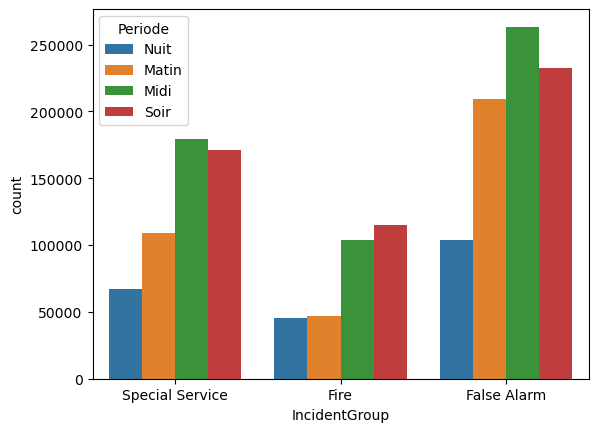

In [46]:
# Nombre d'incident et le type d'urgence en fonction de la période de la journée
sns.countplot(x="IncidentGroup" , hue = "Periode", data = Incidents)
plt.label("Frequence d'incident en fonction du type d'urgence et la période de la journée")
plt.show()

In [41]:
# Type de service spéecial
pd.crosstab(Incidents.SpecialServiceType, "freq")

col_0,freq
SpecialServiceType,
Advice Only,8084
Animal assistance incidents,10235
Assist other agencies,17919
Effecting entry/exit,112639
Evacuation (no fire),3447
Flooding,105764
Hazardous Materials incident,8521
Lift Release,96018
Making Safe (not RTC),15327


In [ ]:
# Nombre d'intervention en focntion du mois. Faire avec précison par année aussi
plt.bar(Incidents.DateOfCall.dt.month.value_counts().index,Incidents.DateOfCall.dt.month.value_counts())